## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 8: Clustering Anlysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## Clustering Model


### Clustering Example using a 2-dimensional dataset

In [11]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
BM = report_df.year == 2019
report2019_df = report_df[BM]

In [12]:
report2019_df

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
9,Afghanistan,Asia,2019,38041754.0,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
19,Albania,Europe,2019,2854191.0,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
29,Algeria,Africa,2019,43053054.0,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
39,Argentina,South America,2019,44938712.0,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
49,Armenia,Europe,2019,2957731.0,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Uruguay,South America,2019,3461734.0,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,0.889,0.222
1189,Uzbekistan,Asia,2019,33580650.0,6.154,8.853,0.915,65.4,0.970,0.304,0.511,0.845,0.220
1199,Vietnam,Asia,2019,96462106.0,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186
1209,Zambia,Africa,2019,17861030.0,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394


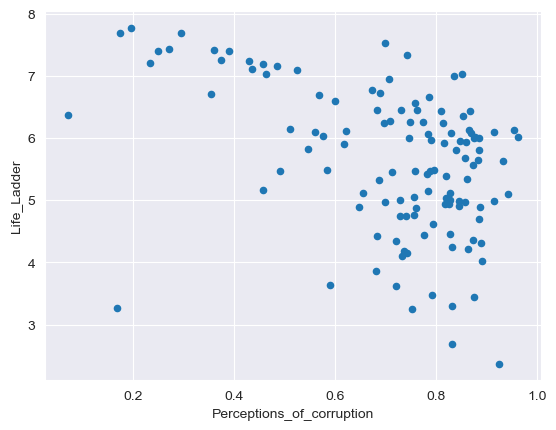

In [14]:
report2019_df.plot.scatter(x='Perceptions_of_corruption',y='Life_Ladder')
plt.show()

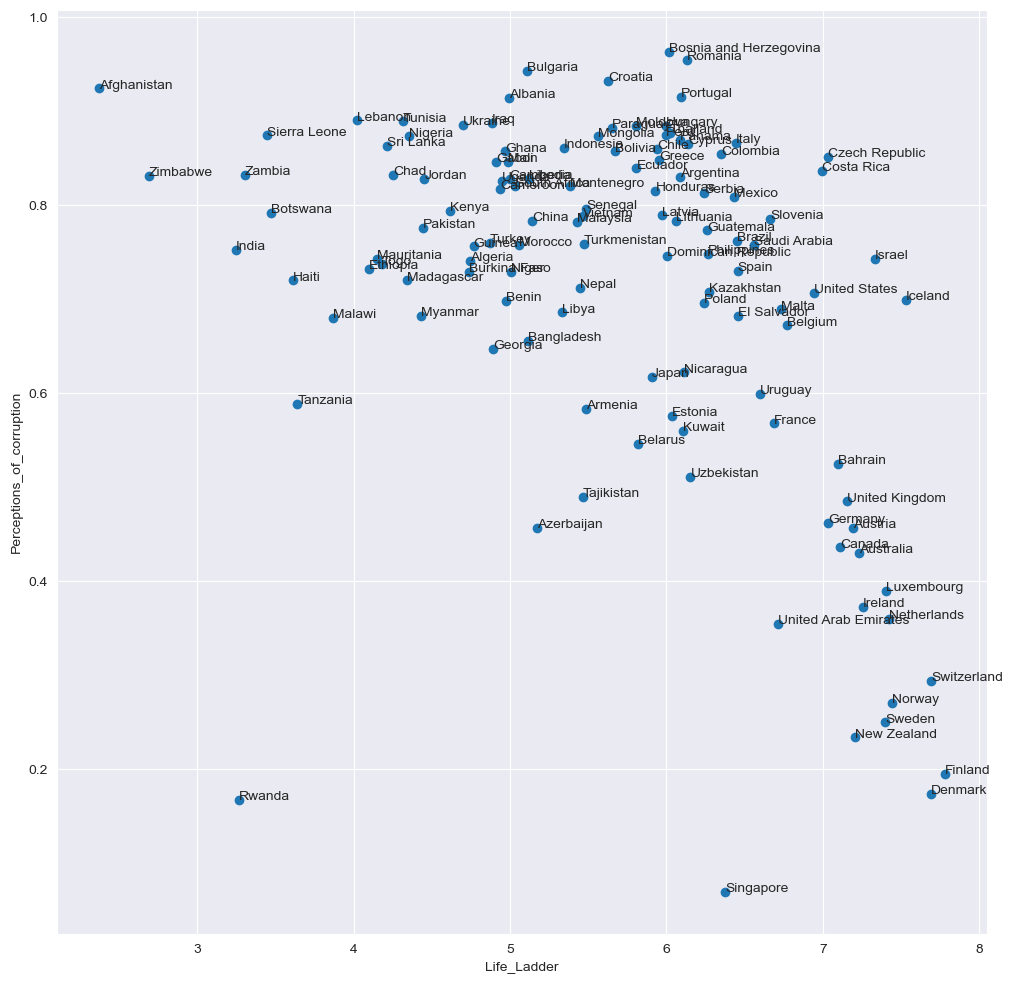

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption)

for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))

plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')

plt.show()

### Clustering Example using a 3-dimensional dataset

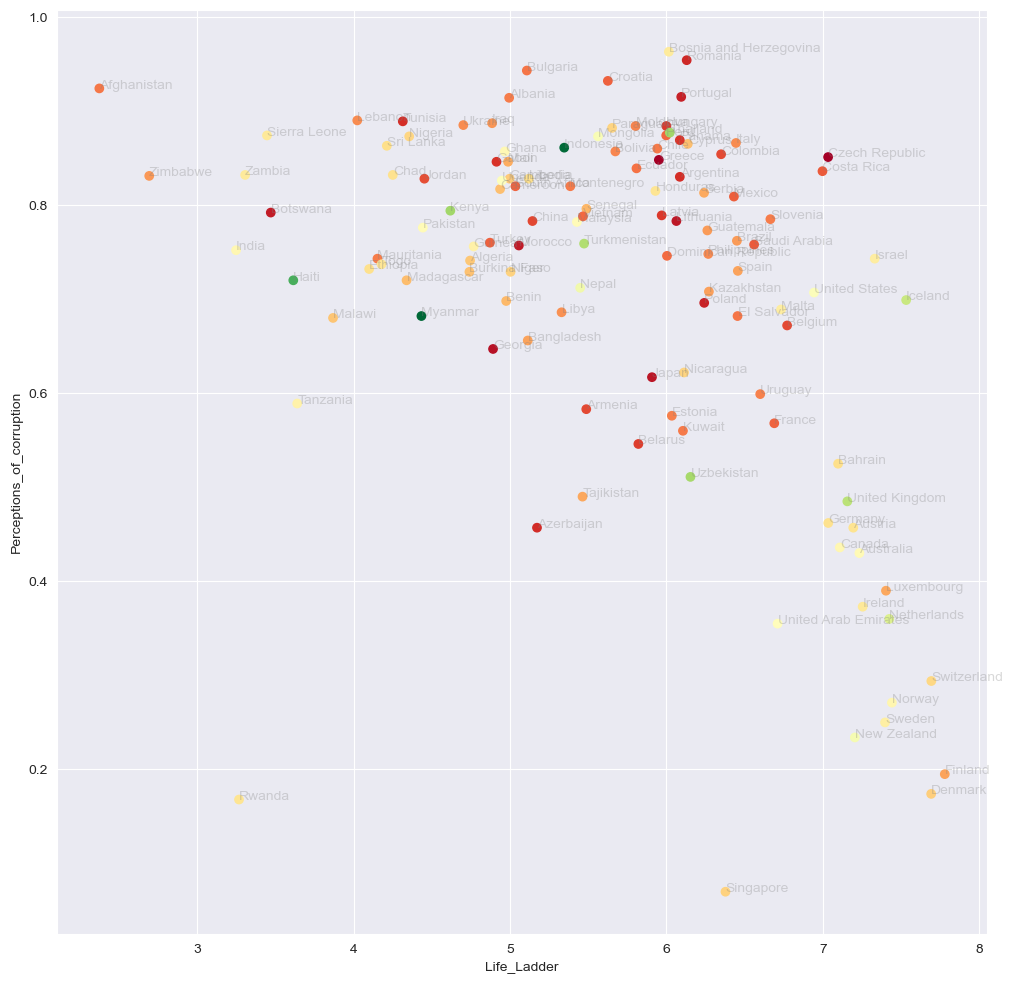

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption, c=report2019_df.Generosity,cmap='RdYlGn')
for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder,
                 row.Perceptions_of_corruption),
                 c='grey',alpha=0.3)
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()


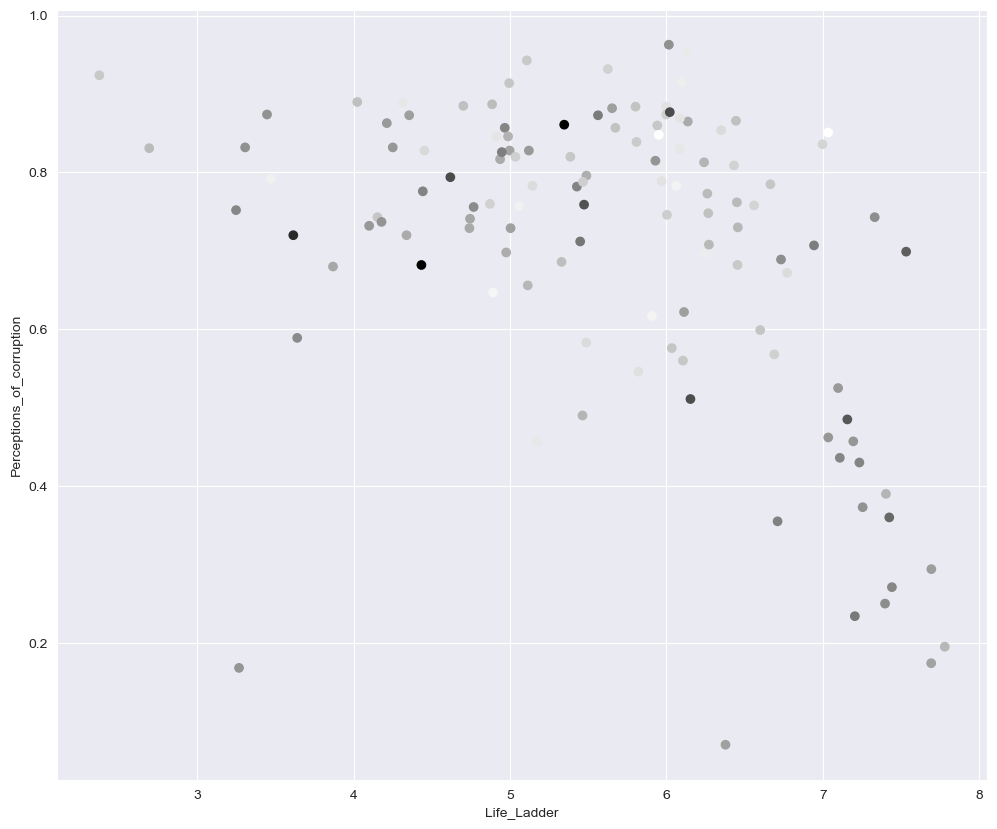

In [26]:
plt.figure(figsize=(12,10))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption,c=report2019_df.Generosity,cmap='binary')

plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')

plt.show()

## K-Means Algorithm

### Using K-Means to cluster a 2-dimensional dataset

In [27]:
from sklearn.cluster import KMeans
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)


KMeans(n_clusters=6)

In [29]:
print(kmeans.labels_)

[3 0 0 2 4 1 1 0 1 0 4 1 0 4 2 3 2 0 0 0 0 1 5 2 0 2 1 4 2 1 1 2 4 2 2 5 1
 1 0 0 1 0 2 2 0 3 2 2 1 3 4 0 1 1 2 2 5 2 0 2 2 5 0 4 2 1 5 5 4 0 1 5 2 4
 4 4 0 5 4 1 1 2 0 5 1 5 2 4 2 2 2 2 2 3 2 4 2 3 2 2 0 2 5 1 1 4 3 2 5 5 0
 4 0 0 1 1 1 2 2 4 3 3]


In [28]:
for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Albania' 'Algeria' 'Azerbaijan' 'Bangladesh' 'Benin' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia' 'Ghana'
 'Guinea' 'Iraq' 'Kenya' 'Liberia' 'Mali' 'Morocco' 'Niger' 'South Africa'
 'Turkey' 'Uganda' 'Ukraine']
Cluster 1: ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Canada' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Iceland'
 'Ireland' 'Israel' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand'
 'Norway' 'Sweden' 'Switzerland' 'United Arab Emirates' 'United Kingdom'
 'United States']
Cluster 2: ['Argentina' 'Bosnia and Herzegovina' 'Brazil' 'Chile' 'Colombia' 'Cyprus'
 'Dominican Republic' 'El Salvador' 'Estonia' 'Greece' 'Guatemala'
 'Honduras' 'Hungary' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia'
 'Lithuania' 'Mexico' 'Nicaragua' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Romania' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovenia'
 'Spain' 'Thailand' 'Uruguay' 'Uzbekistan']
Cluster 3: ['Afghanistan' 'Botswana

In [30]:
from sklearn.cluster import KMeans
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)

for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Argentina' 'Bosnia and Herzegovina' 'Brazil' 'Chile' 'Colombia' 'Cyprus'
 'Dominican Republic' 'El Salvador' 'Estonia' 'Greece' 'Guatemala'
 'Honduras' 'Hungary' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia'
 'Lithuania' 'Mexico' 'Nicaragua' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Romania' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovenia'
 'Spain' 'Thailand' 'Uruguay' 'Uzbekistan']
Cluster 1: ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Canada' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Iceland'
 'Ireland' 'Israel' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand'
 'Norway' 'Sweden' 'Switzerland' 'United Arab Emirates' 'United Kingdom'
 'United States']
Cluster 2: ['Botswana' 'Chad' 'Ethiopia' 'Haiti' 'India' 'Lebanon' 'Madagascar'
 'Malawi' 'Mauritania' 'Rwanda' 'Sierra Leone' 'Sri Lanka' 'Tanzania'
 'Togo' 'Tunisia' 'Zambia']
Cluster 3: ['Albania' 'Algeria' 'Azerbaijan' 'Bangladesh' 'Benin' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Camero

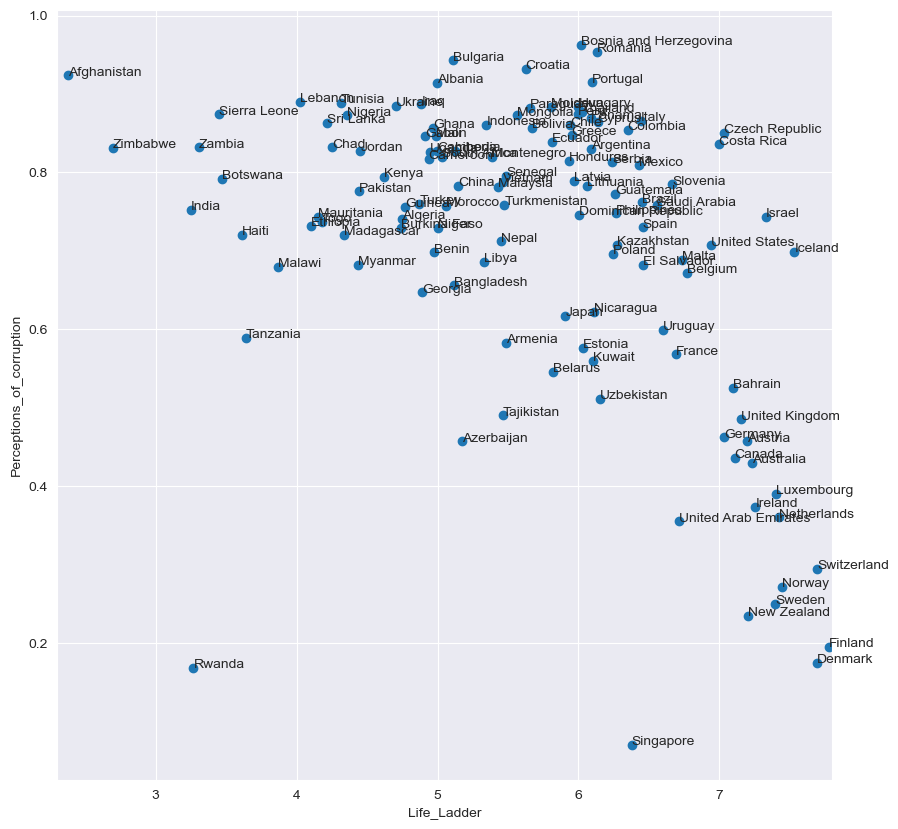

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption)
for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption),rotation=0)
plt.xlim([2.3,7.8])
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()

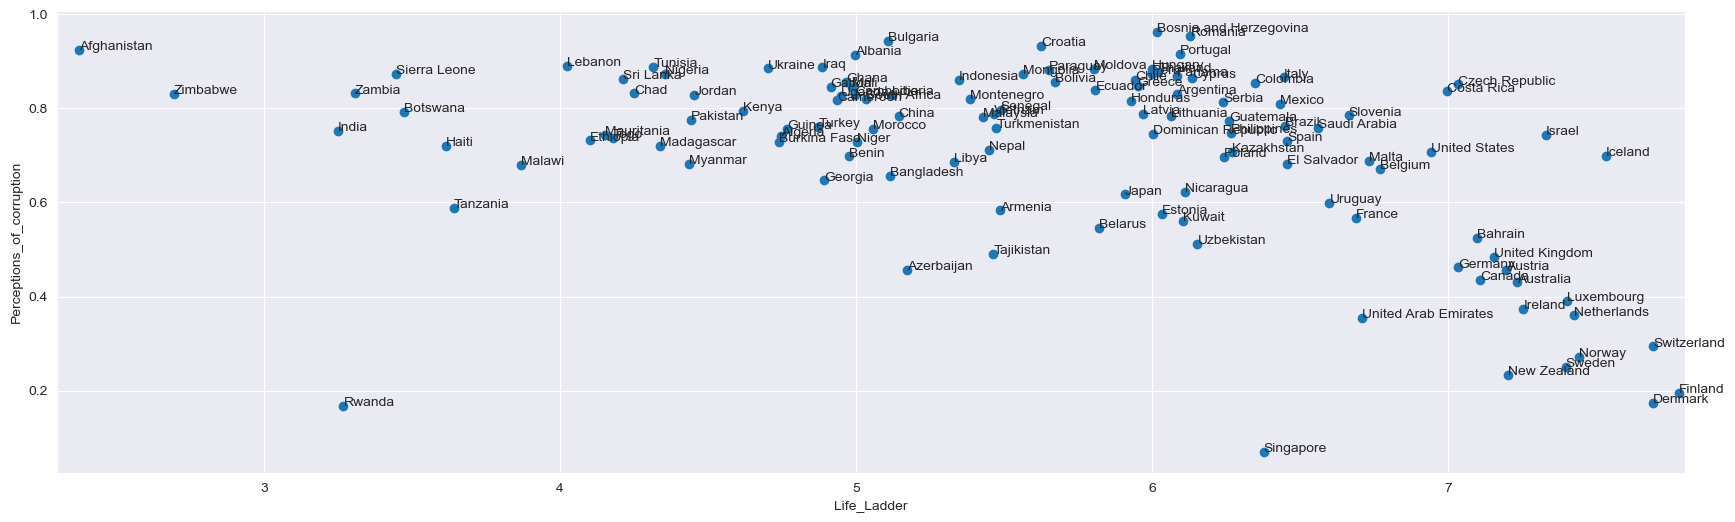

In [33]:
plt.figure(figsize=(21,6))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption)
for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption),rotation=0)
plt.xlim([2.3,7.8])
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()

In [0]:
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)

for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

In [43]:
kmeans.labels_

array([0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0], dtype=int32)

### Using K-Means to cluster a dataset with more than 2 dimensions

In [38]:
dimensions = [ 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
              'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
              'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)

for i in range(3):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Afghanistan' 'Bangladesh' 'Benin' 'Burkina Faso' 'Cambodia' 'Cameroon'
 'Chad' 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Lebanon' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Morocco'
 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe']
Cluster 1: ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Belarus'
 'Belgium' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Georgia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Japan'
 'Jordan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Malaysia'
 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Nicaragua' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania'
 'Saudi Arabia' 'Serbia' 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka



### Centroid Analysis

In [47]:
import seaborn as sns
clusters = ['Cluster {}'.format(i) for i in range(3)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)

In [48]:
Centroids

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Cluster 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


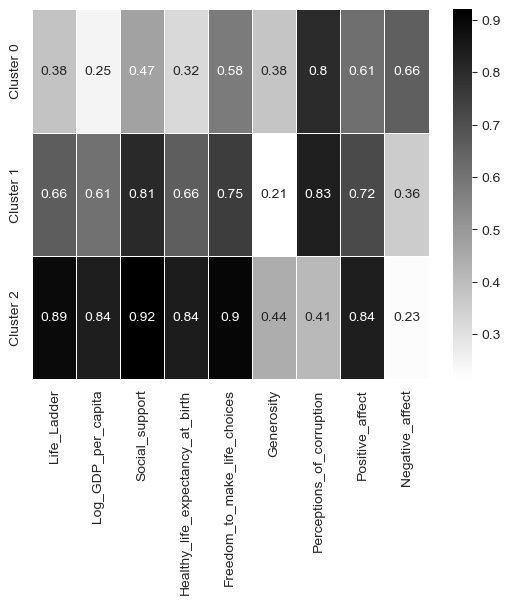

In [49]:
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()